In [1]:
import os
import cv2
import numpy as np
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
import tensorflow as tf

import matplotlib.pyplot as plt

In [2]:
train_folder = 'train/'
test_folder ='test/'


In [3]:
def preprocess(dataset_folder):
    subfolders = os.listdir(dataset_folder)
    temp = subfolders    
    images = []
    last = []
    labels = []
    i = 0
    for subfolder in subfolders:
        sub_folder_index = temp.index(subfolder)
        label = sub_folder_index
        path = dataset_folder + '/'+subfolder
        sub_folder_images = os.listdir(path)

        for image in sub_folder_images:
            image_path = path + '/'+image
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image , (48 , 48))
            images.append(image)
            labels.append(label)
            i+=1
        last.append(i)

    images_x = np.array(images)
    labesl_y = np.array(labels)
    images_x = images_x/255
    
    num_of_classes = 7
    labels_y_encoded = tf.keras.utils.to_categorical(labesl_y,num_classes=num_of_classes)
    return images_x , labels_y_encoded

        
    
    

In [4]:
X_train , y_train = preprocess(train_folder)

In [5]:
X_test , y_test = preprocess(test_folder)

In [6]:
inputs = Input(shape=(48, 48, 1))

# Block 1
x = Conv2D(32, (3, 3), padding='same', strides=(1, 1), kernel_regularizer=l2(0.001))(inputs)
x = Activation('relu')(x)
x = Dropout(0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Block 2
x = Conv2D(64, (3, 3), padding='same', strides=(1, 1), kernel_regularizer=l2(0.001))(x)
x = Activation('relu')(x)
x = Dropout(0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Block 3
x = Conv2D(128, (3, 3), padding='same', strides=(1, 1), kernel_regularizer=l2(0.001))(x)
x = Activation('relu')(x)
x = Dropout(0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Block 4
x = Conv2D(256, (3, 3), padding='same', strides=(1, 1), kernel_regularizer=l2(0.001))(x)
x = Activation('relu')(x)
x = Dropout(0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Fully connected layers
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)

# Output layer for 7 classes
outputs = Dense(7, activation='softmax')(x)


## using adam optimizer

In [7]:
model = Model(inputs = inputs , outputs = outputs)
model.compile(optimizer = "sgd" , loss = ["categorical_crossentropy"] , metrics=["accuracy"])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                            

In [8]:
file_s = 'emotion_model_sgd.h5'
checkpointer = ModelCheckpoint(
    file_s , 
    monitor='loss',
    verbose = 1,
    save_best_only=True,
    save_weights_only=False,
    mode = 'auto',
    save_freq='epoch'
)

callback_list = [checkpointer]

In [9]:
save = model.fit(X_train , y_train , batch_size=32 , validation_data=(X_test , y_test) , epochs = 50 , callbacks=[callback_list] )

Epoch 1/50


897/898 [============================>.] - ETA: 0s - loss: 2.1141 - accuracy: 0.2480
Epoch 1: loss improved from inf to 2.11412, saving model to emotion_model_sgd.h5
898/898 [==============================] - 76s 82ms/step - loss: 2.1141 - accuracy: 0.2480 - val_loss: 2.1043 - val_accuracy: 0.2470
Epoch 2/50


C:\Users\windows\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


897/898 [============================>.] - ETA: 0s - loss: 2.0780 - accuracy: 0.2537
Epoch 2: loss improved from 2.11412 to 2.07804, saving model to emotion_model_sgd.h5
898/898 [==============================] - 78s 87ms/step - loss: 2.0780 - accuracy: 0.2537 - val_loss: 2.0761 - val_accuracy: 0.2655
Epoch 3/50
897/898 [============================>.] - ETA: 0s - loss: 2.0443 - accuracy: 0.2736
Epoch 3: loss improved from 2.07804 to 2.04427, saving model to emotion_model_sgd.h5
898/898 [==============================] - 80s 89ms/step - loss: 2.0443 - accuracy: 0.2736 - val_loss: 2.0628 - val_accuracy: 0.2520
Epoch 4/50
897/898 [============================>.] - ETA: 0s - loss: 2.0080 - accuracy: 0.2978
Epoch 4: loss improved from 2.04427 to 2.00795, saving model to emotion_model_sgd.h5
898/898 [==============================] - 76s 84ms/step - loss: 2.0079 - accuracy: 0.2978 - val_loss: 2.0056 - val_accuracy: 0.3147
Epoch 5/50
897/898 [============================>.] - ETA: 0s - loss:

897/898 [============================>.] - ETA: 0s - loss: 1.2501 - accuracy: 0.6008
Epoch 28: loss improved from 1.27417 to 1.25007, saving model to emotion_model_sgd.h5
898/898 [==============================] - 67s 75ms/step - loss: 1.2501 - accuracy: 0.6008 - val_loss: 1.4836 - val_accuracy: 0.4987
Epoch 29/50
897/898 [============================>.] - ETA: 0s - loss: 1.2215 - accuracy: 0.6090
Epoch 29: loss improved from 1.25007 to 1.22142, saving model to emotion_model_sgd.h5
898/898 [==============================] - 67s 75ms/step - loss: 1.2214 - accuracy: 0.6090 - val_loss: 1.4740 - val_accuracy: 0.5100
Epoch 30/50
897/898 [============================>.] - ETA: 0s - loss: 1.1940 - accuracy: 0.6218
Epoch 30: loss improved from 1.22142 to 1.19406, saving model to emotion_model_sgd.h5
898/898 [==============================] - 67s 75ms/step - loss: 1.1941 - accuracy: 0.6218 - val_loss: 1.6318 - val_accuracy: 0.4448
Epoch 31/50
897/898 [============================>.] - ETA: 0s -

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

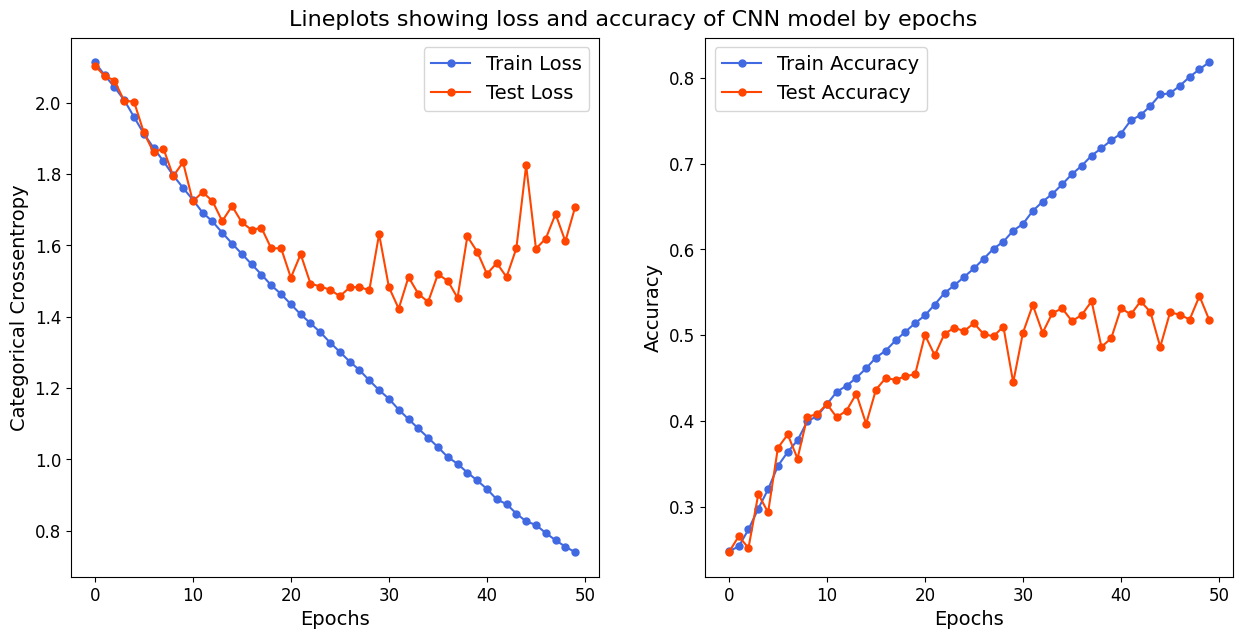

In [10]:
train_loss = save.history['loss']
test_loss = save.history['val_loss']
train_accuracy = save.history['accuracy']
test_accuracy = save.history['val_accuracy']

# Plotting a line chart to visualize the loss and accuracy values by epochs.
fig, ax = plt.subplots(ncols=2, figsize=(15,7))
ax = ax.ravel()
ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)
ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)
ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)
ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)
ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)
ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)
fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)